# Load and View Data

In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

In [3]:
path = 'D:/code/1SU25-DPL/PRJ-audio/archive'
path_audio = path+'audio/'
os.listdir(path)

['audio', 'audio_labels.csv', 'esc50.csv', 'esc50_labels.csv']

In [6]:
au_csv = pd.read_csv(r'D:\code\1SU25-DPL\PRJ-audio\archive\esc50.csv')

In [7]:
au_csv.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [8]:
au_csv.tail()

,filename,fold,target,category,esc10,src_file,take
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A
1999,5-9032-A-0.wav,5,0,dog,True,9032,A


In [9]:
au_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


In [10]:
filename = au_csv['filename']
target = au_csv['target']
category = au_csv['category']


In [11]:
new_df = pd.DataFrame({
    'filename': filename,
    'target': target,
    "category": category
})
new_df.to_csv('audio_labels.csv', index=False)

In [12]:
label_csv = pd.read_csv('audio_labels.csv')

In [13]:
label_csv.head()

,filename,target,category
0,1-100032-A-0.wav,0,dog
1,1-100038-A-14.wav,14,chirping_birds
2,1-100210-A-36.wav,36,vacuum_cleaner
3,1-100210-B-36.wav,36,vacuum_cleaner
4,1-101296-A-19.wav,19,thunderstorm


In [14]:
label_csv.tail()

,filename,target,category
1995,5-263831-B-6.wav,6,hen
1996,5-263902-A-36.wav,36,vacuum_cleaner
1997,5-51149-A-25.wav,25,footsteps
1998,5-61635-A-8.wav,8,sheep
1999,5-9032-A-0.wav,0,dog


In [15]:
label_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   target    2000 non-null   int64 
 2   category  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [16]:
label2num = au_csv[['target', 'category']].drop_duplicates().sort_values('target')
print(label2num)

     target          category
0         0               dog
141       1           rooster
99        2               pig
49        3               cow
45        4              frog
175       5               cat
70        6               hen
64        7           insects
29        8             sheep
8         9              crow
62       10              rain
148      11         sea_waves
54       12    crackling_fire
286      13          crickets
1        14    chirping_birds
30       15       water_drops
37       16              wind
27       17     pouring_water
98       18      toilet_flush
4        19      thunderstorm
78       20       crying_baby
136      21          sneezing
11       22          clapping
76       23         breathing
84       24          coughing
39       25         footsteps
68       26          laughing
51       27    brushing_teeth
97       28           snoring
61       29  drinking_sipping
6        30   door_wood_knock
26       31       mouse_click
36       3

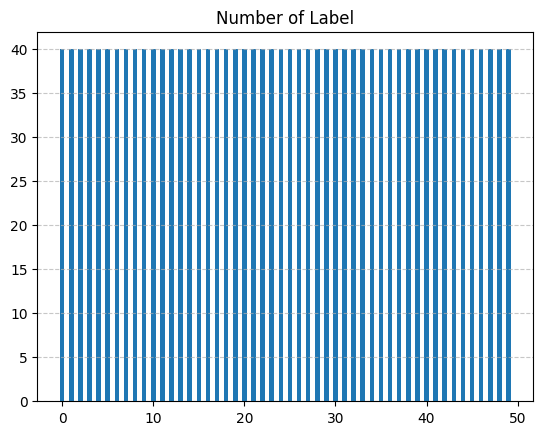

In [17]:
counts = target.value_counts()

plt.bar(counts.index, counts.values, width=0.5)
plt.title('Number of Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
import os
audio_dir = r"D:\code\1SU25-DPL\PRJ-audio\archive\audio\16000"
wav_files = set([f for f in os.listdir(audio_dir) if f.endswith(".wav")])
print(f"Tổng số file .wav: {len(wav_files)}")
print(f"Tổng số mẫu: {len(label_csv)}")
print(f"Các lớp: {label_csv['target'].nunique()}")


Tổng số file .wav: 2000
Tổng số mẫu: 2000
Các lớp: 50


In [20]:
csv_files = set(au_csv['filename'])
missing_in_audio = csv_files - wav_files
extra_in_audio = wav_files - csv_files

if missing_in_audio:
    print(f"\n{len(missing_in_audio)} files listed in CSV but NOT found in audio/:")
    print(list(missing_in_audio)[:10])
else:
    print("All files in the CSV are present in audio.")

if extra_in_audio:
    print(f"\n{len(extra_in_audio)} files found in audio/ but NOT listed in CSV:")
    print(list(extra_in_audio)[:10])
else:
    print("No extra files in audio.")


All files in the CSV are present in audio.
No extra files in audio.


In [20]:
import os, numpy as np, pandas as pd
import librosa, matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import models, transforms
from sklearn.metrics import accuracy_score


In [21]:
def extract_mel_rgb(path, n_mels=128):
    y, sr = librosa.load(path, sr=44100)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    mel_db = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min()) * 255
    mel_db = np.uint8(mel_db)
    mel_db = np.stack([mel_db]*3, axis=-1)
    return mel_db


In [22]:
class AudioDataset(Dataset):
    def __init__(self, df_idx, transform=None):
        self.df_idx = df_idx
        self.transform = transform

    def __len__(self): return len(self.df_idx)

    def __getitem__(self, idx):
        row = au_csv.iloc[self.df_idx[idx]]
        path = os.path.join(audio_dir, row['filename'])
        mel_img = extract_mel_rgb(path)  
        mel_img = transforms.ToPILImage()(mel_img) 
        if self.transform: mel_img = self.transform(mel_img)
        label = row['target']
        return mel_img, label


In [23]:
idx = np.arange(len(au_csv))
train_val_idx, test_idx = train_test_split(
    idx, test_size=0.20, stratify=au_csv['target'], random_state=42
)

val_size = 0.05 / 0.80
train_idx, val_idx = train_test_split(
    train_val_idx, test_size=val_size, stratify=au_csv.loc[train_val_idx, 'target'], random_state=42
)

print(f'train: {len(train_idx)}')
print(f'val: {len(val_idx)}')
print(f'test: {len(test_idx)}')

train: 1500
val: 100
test: 400


# Data processing

In [25]:
tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

train_set = AudioDataset(train_idx, transform=tfms)
val_set   = AudioDataset(val_idx, transform=tfms)
test_set  = AudioDataset(test_idx, transform=tfms)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=64)
test_loader  = DataLoader(test_set, batch_size=64)


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, au_csv['target'].nunique())
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Train model

In [27]:
def compute_loss_acc(loader):
    model.eval()
    total_loss, y_true, y_pred = 0.0, [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            total_loss += loss.item()
            preds = logits.argmax(1)
            y_true.extend(yb.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    avg_loss = total_loss / len(loader)
    acc = accuracy_score(y_true, y_pred)
    return avg_loss, acc


In [27]:
n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs}"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        preds = logits.argmax(1)
        train_correct += (preds == yb).sum().item()
        train_total += yb.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_acc = train_correct / train_total

    val_loss, val_acc = compute_loss_acc(val_loader)

    print(f"Epoch [{epoch+1}] | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")


Epoch 1/20: 100%|██████████| 24/24 [00:51<00:00,  2.13s/it]


Epoch [1] | Train Loss: 3.1335, Train Acc: 24.93% | Val Loss: 2.6882, Val Acc: 42.00%


Epoch 2/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [2] | Train Loss: 1.5766, Train Acc: 75.80% | Val Loss: 1.7597, Val Acc: 65.00%


Epoch 3/20: 100%|██████████| 24/24 [00:37<00:00,  1.56s/it]


Epoch [3] | Train Loss: 0.8628, Train Acc: 89.47% | Val Loss: 1.1917, Val Acc: 73.00%


Epoch 4/20: 100%|██████████| 24/24 [00:37<00:00,  1.57s/it]


Epoch [4] | Train Loss: 0.4764, Train Acc: 96.73% | Val Loss: 0.9347, Val Acc: 81.00%


Epoch 5/20: 100%|██████████| 24/24 [00:37<00:00,  1.56s/it]


Epoch [5] | Train Loss: 0.2559, Train Acc: 98.93% | Val Loss: 0.8576, Val Acc: 81.00%


Epoch 6/20: 100%|██████████| 24/24 [00:36<00:00,  1.54s/it]


Epoch [6] | Train Loss: 0.1429, Train Acc: 99.93% | Val Loss: 0.8291, Val Acc: 81.00%


Epoch 7/20: 100%|██████████| 24/24 [00:36<00:00,  1.54s/it]


Epoch [7] | Train Loss: 0.0945, Train Acc: 99.93% | Val Loss: 0.7448, Val Acc: 84.00%


Epoch 8/20: 100%|██████████| 24/24 [00:36<00:00,  1.53s/it]


Epoch [8] | Train Loss: 0.0608, Train Acc: 100.00% | Val Loss: 0.7176, Val Acc: 84.00%


Epoch 9/20: 100%|██████████| 24/24 [00:37<00:00,  1.56s/it]


Epoch [9] | Train Loss: 0.0476, Train Acc: 100.00% | Val Loss: 0.7028, Val Acc: 85.00%


Epoch 10/20: 100%|██████████| 24/24 [00:36<00:00,  1.54s/it]


Epoch [10] | Train Loss: 0.0373, Train Acc: 100.00% | Val Loss: 0.6884, Val Acc: 82.00%


Epoch 11/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [11] | Train Loss: 0.0309, Train Acc: 100.00% | Val Loss: 0.6749, Val Acc: 85.00%


Epoch 12/20: 100%|██████████| 24/24 [00:37<00:00,  1.54s/it]


Epoch [12] | Train Loss: 0.0243, Train Acc: 100.00% | Val Loss: 0.6723, Val Acc: 81.00%


Epoch 13/20: 100%|██████████| 24/24 [00:37<00:00,  1.56s/it]


Epoch [13] | Train Loss: 0.0198, Train Acc: 100.00% | Val Loss: 0.6543, Val Acc: 84.00%


Epoch 14/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [14] | Train Loss: 0.0173, Train Acc: 100.00% | Val Loss: 0.6474, Val Acc: 84.00%


Epoch 15/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [15] | Train Loss: 0.0168, Train Acc: 100.00% | Val Loss: 0.6354, Val Acc: 83.00%


Epoch 16/20: 100%|██████████| 24/24 [00:38<00:00,  1.62s/it]


Epoch [16] | Train Loss: 0.0159, Train Acc: 100.00% | Val Loss: 0.6433, Val Acc: 85.00%


Epoch 17/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [17] | Train Loss: 0.0183, Train Acc: 99.93% | Val Loss: 0.6450, Val Acc: 84.00%


Epoch 18/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [18] | Train Loss: 0.0155, Train Acc: 100.00% | Val Loss: 0.6730, Val Acc: 81.00%


Epoch 19/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [19] | Train Loss: 0.0160, Train Acc: 100.00% | Val Loss: 0.6214, Val Acc: 86.00%


Epoch 20/20: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]


Epoch [20] | Train Loss: 0.0141, Train Acc: 100.00% | Val Loss: 0.6443, Val Acc: 84.00%


# Test model

In [28]:
test_loss, test_acc = compute_loss_acc(test_loader)
print(test_loss)
print(test_acc)

0.634003779717854
0.84


# Save model

In [29]:
torch.save(model.state_dict(), "esc50_resnet18.pth")


In [ ]:
model.load_state_dict(torch.load("esc50_resnet18.pth"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  